#1.Linear Regression

In [14]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load data

In [15]:
df = pd.read_csv('/content/cleaned_data.csv')

# Features and target
X = df[['age', 'BMI', 'currentSmoker']]
y = df['sysBP']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Predictions

In [17]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Predictions

In [18]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


# Metrics

In [19]:
mse_train_lr = mean_squared_error(y_train, y_train_pred)
rmse_train_lr = np.sqrt(mse_train_lr)
r2_train_lr = r2_score(y_train, y_train_pred)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_test_lr = r2_score(y_test, y_test_pred)

In [23]:
print("Linear Regression")
print("Train -> MSE:##", mse_train_lr, "RMSE:##", rmse_train_lr, "R2:##", r2_train_lr)

print("Test  -> MSE:##", mse_test_lr,  "RMSE:##", rmse_test_lr,  "R2:##", r2_test_lr)


Linear Regression
Train -> MSE:## 333.71440171544555 RMSE:## 18.267851590032297 R2:## 0.23123058940175145
Test  -> MSE:## 306.9765152750392 RMSE:## 17.520745283093387 R2:## 0.2200570447027319




*   Simple baseline model, captures linear relationship.
*   Limitations: no regularization, no feature selection, all features treated equally.


*   Due to these limitations, we used Lasso Regression for a more stable and interpretable model.



# 2.Lasso Regression


In [25]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso



# Select features and target

In [ ]:
X = df[['age', 'BMI', 'currentSmoker']]
y = df['sysBP']

#  Train-test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Initialize and train Lasso model

In [27]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

# Extract coefficients (feature importance)

In [29]:
coefficients = pd.Series(
    lasso.coef_,
    index=X.columns
)

# Metrics

In [32]:
mse_train_lasso = mean_squared_error(y_train, y_train_pred)
rmse_train_lasso = np.sqrt(mse_train_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred)

mse_test_lasso = mean_squared_error(y_test, y_test_pred)
rmse_test_lasso = np.sqrt(mse_test_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred)
print("\nLasso Regression")
print("Train -> MSE:", mse_train_lasso, "RMSE:", rmse_train_lasso, "R2:", r2_train_lasso)
print("Test  -> MSE:", mse_test_lasso,  "RMSE:", rmse_test_lasso,  "R2:", r2_test_lasso)
print("########################################")
#  Print coefficients
print("Lasso Coefficients (Feature Importance):")
print(coefficients)



Lasso Regression
Train -> MSE: 333.71440171544555 RMSE: 18.267851590032297 R2: 0.23123058940175145
Test  -> MSE: 306.9765152750392 RMSE: 17.520745283093387 R2: 0.2200570447027319
########################################
Lasso Coefficients (Feature Importance):
age              0.878233
BMI              1.479516
currentSmoker    0.000000
dtype: float64


# Feature Importance Visualization


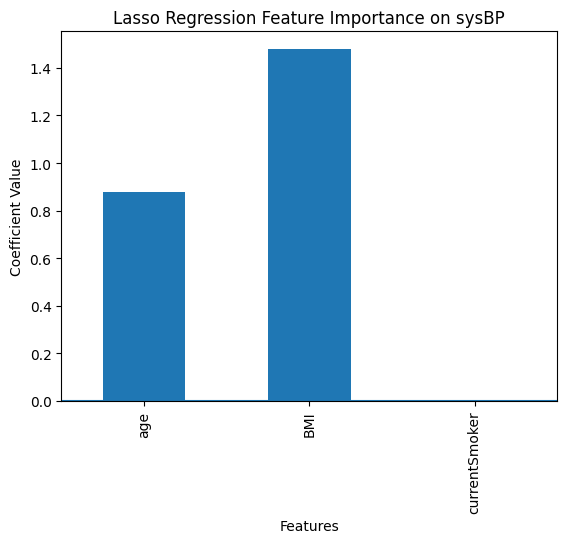

In [33]:
plt.figure()
coefficients.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Feature Importance on sysBP')
plt.axhline(0)  # reference line
plt.show()



*   Provides L1 regularization → reduces overfitting.
*   Performs feature selection: BMI strongest, Age moderate, currentSmoker negligible.


*   Stable, interpretable, and highlights key predictors for sysBP.

**Conclusion: Lasso offers a simple, effective, and interpretable model.**




